In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('Airlines_graph.csv')

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
data.shape


data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [3]:
nx.__version__

'2.8.4'

In [4]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24396\3093572283.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [5]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24396\4019421568.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24396\4019421568.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [6]:
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24396\707532253.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


In [7]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [8]:
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

In [9]:
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [10]:
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [11]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

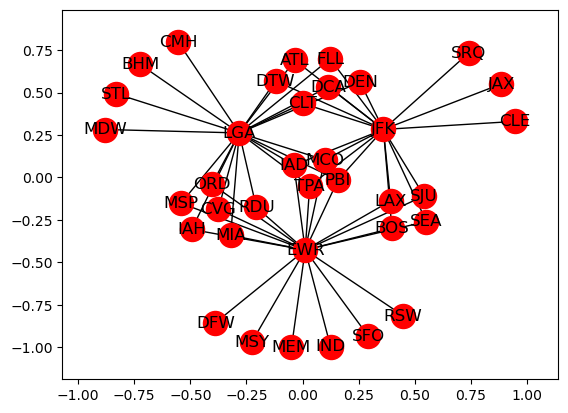

In [12]:
# your code is here (Quick view of the Graph.) 
fig, ax = plt.subplots()
nx.draw(FG, with_labels=True, node_color = 'red', ax=ax)
limits = plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

In [13]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
# Calculate average edge density of the Graph

# your code is here
nx.density(FG)

0.09047619047619047

In [14]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [15]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

In [16]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [17]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [18]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

### ASSIGNMENT-4 (100 Points)

Please use the Airlines_graph.csv for the following questions.

1. Please fill "your code here" sections on above cells (10 Points).

2. How many maximal cliques we can spot in this airline network? (20 Points)

3. List the most busiest/popular airport. (20 Points) 

4. As a thought leader, identify 6 new routes to recommend. Hint: Think if the pairs are symmetric or not and make your assumption/observation accordingly i.e. whether ORD-LAX and LAX-ORD two separate routes? (50 Points)



### 2. How many maximal cliques we can spot in this airline network? (20 Points)

In [19]:
print("The number of maximal cliques we can spot in this airline network = " + str(nx.graph_number_of_cliques(FG)))

The number of maximal cliques we can spot in this airline network = 57


### 3. List the most busiest/popular airport. (20 Points)

In [20]:
x = pd.DataFrame(nx.degree_centrality(FG).items(), columns=['Airport', 'Degree of Centrality']).sort_values(by=['Degree of Centrality'], ascending=False)
x.head()

,Airport,Degree of Centrality
0,EWR,0.571429
2,LGA,0.571429
5,JFK,0.485714
15,TPA,0.085714
9,PBI,0.085714


Based on most connected/important airports, EWR and LGA are the most popular airports.

In [21]:
pd.DataFrame(nx.eigenvector_centrality(FG).items(), columns=['Airport', 'Eigen Vector Centrality']).sort_values(by=['Eigen Vector Centrality'], ascending=False).head()

,Airport,Eigen Vector Centrality
2,LGA,0.439292
0,EWR,0.412704
5,JFK,0.369731
15,TPA,0.198683
9,PBI,0.198683


Based on which airport is connected to most important airports, LGA is the most popular one

In [22]:
pd.DataFrame(nx.betweenness_centrality(FG).items(), columns=['Airport', 'Betweeness Centrality']).sort_values(by=['Betweeness Centrality'], ascending=False).head()

,Airport,Betweeness Centrality
0,EWR,0.447339
2,LGA,0.409524
5,JFK,0.309524
10,MCO,0.030812
15,TPA,0.030812


Based on which airport occurs most frequently between routes, EWR is the most popular

### 4. As a thought leader, identify 6 new routes to recommend. Hint: Think if the pairs are symmetric or not and make your assumption/observation accordingly i.e. whether ORD-LAX and LAX-ORD two separate routes? (50 Points)

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
def weight(source, dest):
    airtime = data.loc[(data['origin'] == source) & (data['dest'] == dest), 'air_time'].mean()
    distance = data.loc[(data['origin'] == source) & (data['dest'] == dest), 'distance'].mean()
    freq = data.loc[(data['origin'] == source) & (data['dest'] == dest), 'distance'].count()

    travel_speed = distance/(airtime) #speed
    importance = x.loc[x['Airport'] == dest, 'Degree of Centrality'].values[0]

    if np.isnan(travel_speed):
        paths = list(nx.dijkstra_path(FG, source, dest))
        travel_speed = 0
        importance = 0

        for i in range(len(paths)):
            if i != (len(paths) - 1):
                if paths[i] in data['origin'].values:
                    value = paths[i]
                    dest_2 = paths[i+1]
                else:
                    value = paths[i+1]
                    dest_2 = paths[i]
                airtime = data.loc[(data['origin'] == value) & (data['dest'] == dest_2), 'air_time'].mean()
                distance = data.loc[(data['origin'] == value) & (data['dest'] == dest_2), 'distance'].mean()
                
                travel_speed = travel_speed + ((distance/(airtime)))  #speed
                importance = importance + x.loc[x['Airport'] == dest_2, 'Degree of Centrality'].values[0]

    return travel_speed, importance

path_length = pd.DataFrame(columns = ['Combo', 'Source', 'Destination', 'Path_Length'])

for s in FG.nodes:
    t = list(FG.nodes)
    t.remove(s)
    for i in t:
        weight_get, importance = weight(s, i)
        if ((s+i) not in path_length['Combo'].values) & ((i+s) not in path_length['Combo'].values):
            path_length = path_length.append({'Combo': s+i, 'Source': s, 'Destination':i, 'Path_Length':weight_get, 'DoC': importance}, ignore_index=True)


def get_weight(path_length, source, target):
    weight_total = path_length.loc[(path_length['Combo'] == source+target) | (path_length['Combo'] == target+source), 'Path_Length'].values[0]
    
    return weight_total

def get_importance(path_length, source, target):
    weight_total = path_length.loc[(path_length['Combo'] == source+target) | (path_length['Combo'] == target+source), 'DoC'].values[0]
    
    return weight_total

paths_df = pd.DataFrame(columns = ['Combo', 'Airport', 'Destination', 'Paths', 'Weight'])
for source in FG.nodes:
    target = list(FG.nodes)
    removed_list = [n for n in target if n != source]
    path_list = []
    value = source
    for dest in removed_list:
        if (source+dest not in paths_df["Combo"].values) and (dest+source not in paths_df["Combo"].values):
            path = nx.dijkstra_path(FG, source=source, target=dest, weight=get_weight(path_length, source, dest))
            path_list.append([source+dest, source, dest, path, get_weight(path_length, source, dest), get_importance(path_length, source, dest)])
    
    path_list = pd.DataFrame(path_list,columns=['Combo', 'Airport', 'Destination', 'Paths', 'Weight', 'DoC'])
    paths_df = pd.concat([paths_df,path_list])
    paths_df = paths_df[paths_df['Combo'] != dest+source]

paths_df = paths_df.sort_values(by=['DoC', 'Weight'], ascending=[False, False])

paths_df['Length'] = [len(x[0]) for x in zip(paths_df['Paths'])]

In [25]:
new_paths = paths_df[paths_df['Length'] == 3]
new_paths[['Combo', 'Airport', 'Destination', 'Paths', 'Weight', 'DoC']].head(6).style.hide_index()

Combo,Airport,Destination,Paths,Weight,DoC
MCOTPA,MCO,TPA,"['MCO', 'JFK', 'TPA']",14.582065,0.171429
PBIMCO,PBI,MCO,"['PBI', 'LGA', 'MCO']",14.447538,0.171429
PBITPA,PBI,TPA,"['PBI', 'LGA', 'TPA']",14.360042,0.171429
PBIIAD,PBI,IAD,"['PBI', 'LGA', 'IAD']",12.231554,0.171429
IADTPA,IAD,TPA,"['IAD', 'LGA', 'TPA']",11.770594,0.171429
MCOIAD,MCO,IAD,"['MCO', 'JFK', 'IAD']",10.936821,0.171429


I calculated the average speed for each route and found the shortest path using dijkstra, I then chose the paths that have the highest speed (weight here is speed) and based on their total degree of centrality excluding major nodes EWR, JFK & LGA, if they had a high speed and high centrality, I would consider them to be the optimal routes to suggest without including the central nodes. So, I would suggest the below routes, back & forth <br>
1. MCO <-> TPA 
2. PBI <-> MCO
3. PBI <-> TPA
4. PBI <-> IAD
5. IAD <-> TPA
6. MCO <-> IAD